In [1]:
import librosa
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import soundfile as sf
import numpy as np

In [2]:
f0 = 130.82
fd = 16000
duration = 3
note_delay_size = int(0.03 * fd)

In [3]:
def generate(generate_algo, N):
    if generate_algo == "uniform":
        return np.random.uniform(-1, 1, N)
    elif generate_algo == "normal":
        return np.random.normal(0, 1, N)
    elif generate_algo == "equals":
        return np.zeros(N) + 0.3

In [51]:
def karplus_strong(fd, fs, rho, alpha, generate_algo):
    N = int(fd / fs - 1 / 2)
    N_overflow = fd * duration
    y = generate(generate_algo, N)
    y[-1] = 0
    y = np.append(y, np.zeros(N_overflow))
    for n in range(N, N + N_overflow):
        if (alpha == -1):
            y[n] = rho / 2 * (y[n-N] + y[n-N-1])
        else:
            y[n] = rho * (1 - alpha) * y[n-N] + rho * alpha * y[n-N-1]
    return y

In [5]:
def make_chord(notes, generate_algo = "uniform", rho = 1, alpha = -1):
    note_size = fd * duration
    chord_size = int((notes.size - 1) * note_delay_size + note_size)
    X = np.zeros((notes.size, chord_size))
    for i in range(notes.size):
        note = notes[i]
        fk = f0 * 2 ** (note / 12)
        X[
            i, 
            i * note_delay_size : chord_size - (notes.size - 1 - i) *  note_delay_size
        ] = karplus_strong(fd, fk, rho, alpha, generate_algo)[-note_size:]
    return X

## Тестирование разной генерации

In [9]:
chord = make_chord(np.array([0, 4, 7]))
sound = np.sum(chord, axis=0)
sf.write('out_uniform_default.wav', sound, fd) #обычная реализация с uniform генерацией

In [10]:
chord = make_chord(np.array([0, 4, 7]), generate_algo = "normal")
sound = np.sum(chord, axis=0)
sf.write('out_normal_default.wav', sound, fd) #обычная реализация с normal генерацией

In [11]:
chord = make_chord(np.array([0, 4, 7]), generate_algo = "equals")
sound = np.sum(chord, axis=0)
sf.write('out_equals_default.wav', sound, fd) #обычная реализация с equals генерацией

**С любой генерацией аккорд получилось воспроизвести. Однако видны довольно сильные отличия в звучании. Наиболее чистый звук у равномерного распределения.**

## Тестирование разных параметров rho

In [21]:
chord = make_chord(np.array([0, 4, 7]), rho = 1)
sound = np.sum(chord, axis=0) #rho = 1

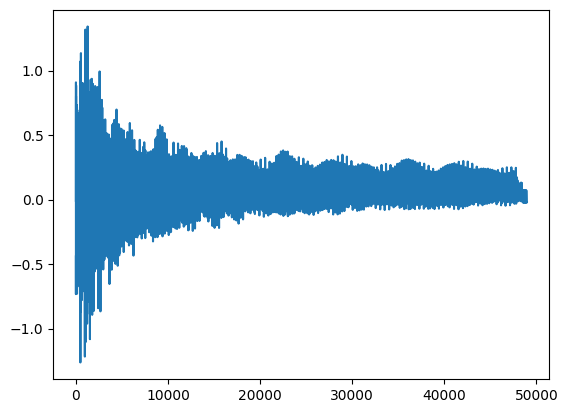

In [22]:
plt.plot(sound)

In [17]:
chord = make_chord(np.array([0, 4, 7]), rho = 0.990)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_rho_0.990t.wav', sound, fd) #rho=0.990

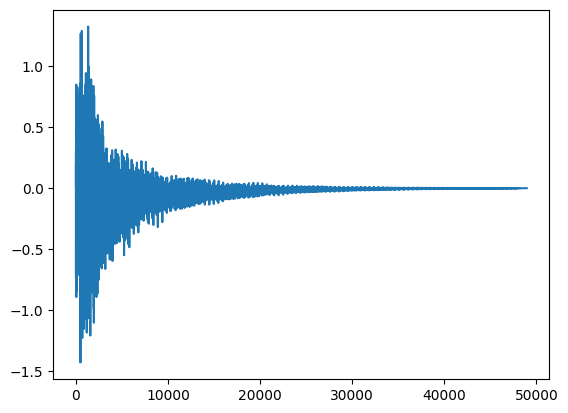

In [18]:
plt.plot(sound)

In [19]:
chord = make_chord(np.array([0, 4, 7]), rho = 0.975)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_rho_0.975t.wav', sound, fd) #rho=0.975

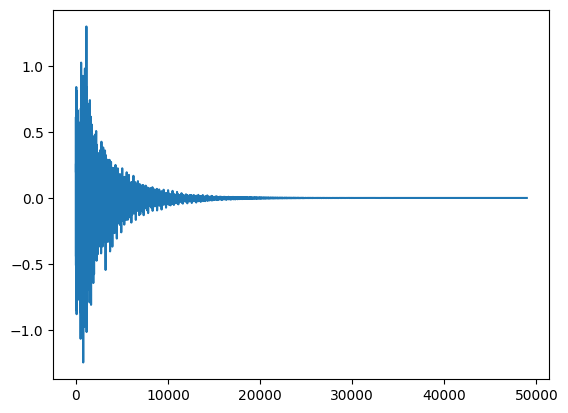

In [20]:
plt.plot(sound)

**Наблюдается очень быстрое затухание звука с уменьшением параметра rho.**

## Тестирование разных параметров alpha

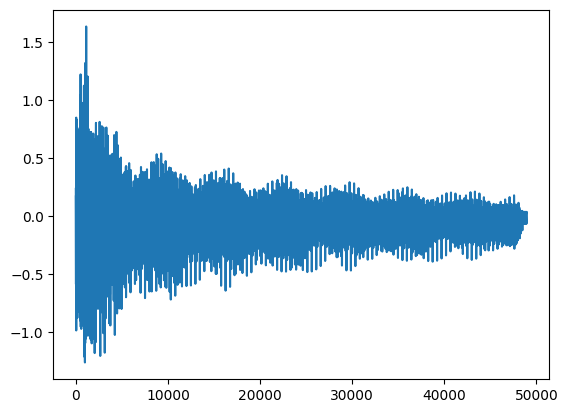

In [65]:
chord = make_chord(np.array([0, 4, 7]), rho = 1)
sound = np.sum(chord, axis=0) #rho = 1
plt.plot(sound)

In [66]:
chord = make_chord(np.array([0, 4, 7]), alpha = 0.55)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_alpha_0.55t.wav', sound, fd) #alpha=0.55

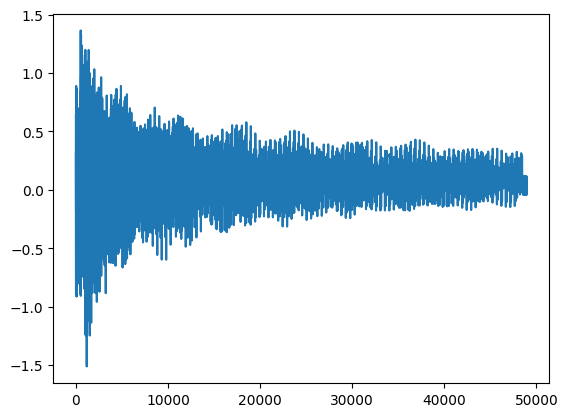

In [67]:
plt.plot(sound)

In [68]:
chord = make_chord(np.array([0, 4, 7]), alpha = 0.45)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_alpha_0.45t.wav', sound, fd) #alpha=0.45

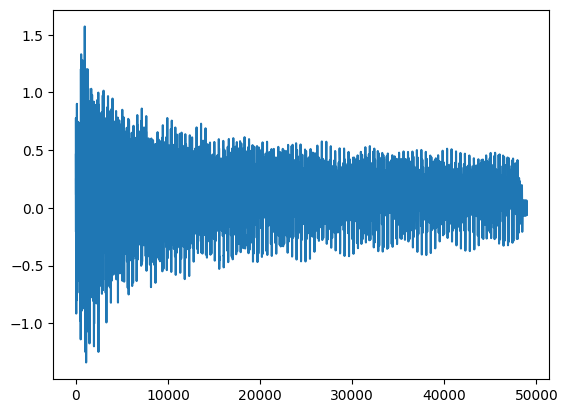

In [69]:
plt.plot(sound)

In [70]:
chord = make_chord(np.array([0, 4, 7]), alpha = 0.3)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_alpha_0.3t.wav', sound, fd) #alpha=0.3

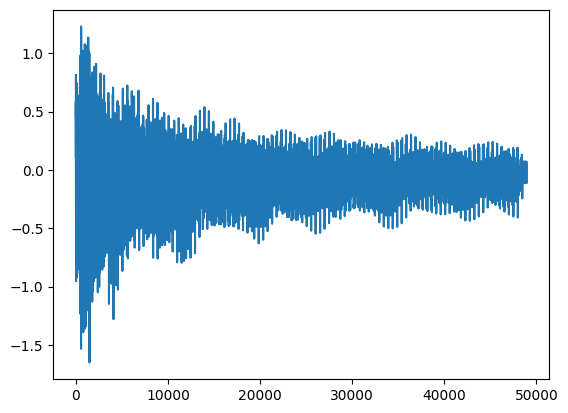

In [71]:
plt.plot(sound)

In [72]:
chord = make_chord(np.array([0, 4, 7]), alpha = 0.95)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_alpha_0.95t.wav', sound, fd) #alpha=0.95

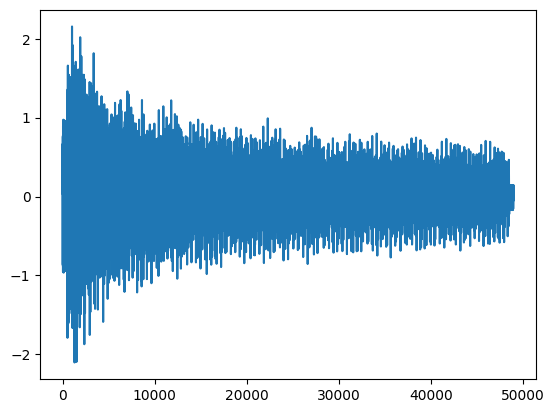

In [73]:
plt.plot(sound)

In [74]:
chord = make_chord(np.array([0, 4, 7]), alpha = 0.05)
sound = np.sum(chord, axis=0)
sf.write('out_uniform_alpha_0.05t.wav', sound, fd) #alpha=0.05

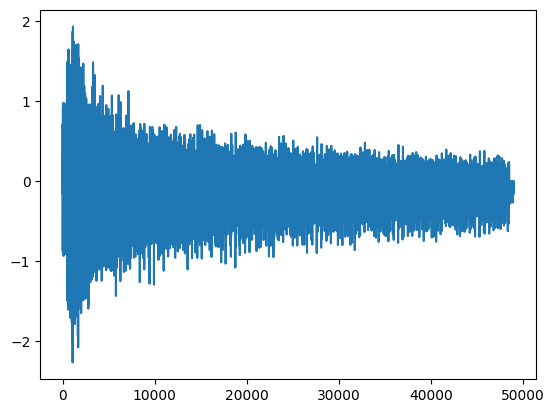

In [75]:
plt.plot(sound)

**Сильное увеличение времени затухания видно только при высоких значениях alpha**

Все сэмплы - https://drive.google.com/drive/folders/1y-MB6w_eMzuyjQEDQldWeTt1kRkHrEZN?usp=sharing